In [ ]:
!pip install metaknowledge
!pip install python-louvain

In [ ]:
import pandas as pd
import numpy as np
import metaknowledge as mk
import networkx as nx
import re
import seaborn as sns
import matplotlib.pyplot as plt
from community import community_louvain

In [ ]:
# Preprocessing Web of science record
with open('wos-raw.txt', 'r') as file:
    text = file.read()
formatted_text = re.sub(r'(PD) \d+((?:.*\n)+?)(PY)', r'\1\2\3', text)
with open('formated-wos.txt', 'w') as file:
    file.write(formatted_text)

In [ ]:
RC = mk.RecordCollection("formated-wos.txt")
len(RC)

567

In [ ]:
RC.writeCSV("records.csv")

data = pd.read_csv("records.csv")
data.head(3)

,id,TI,AF,CR,ID,DI,PT,AU,SO,LA,...,HP,SU,PN,BE,SE,BN,num-Authors,num-Male,num-Female,num-Unknown
0,WOS:000524197200001,"Rediscovering the cash nexus, again: Subsumpti...","Joyce, Simon","ALOISI A, 2014, COMP LABOR LAW POLIC, V37, P65...",ECONOMY|GIG,10.1177/0309816820906356,J,"Joyce, S",CAPITAL AND CLASS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
1,WOS:000224379000006,'Portfolio careers' and the search for flexibi...,"Platman, K","ALDRICH HB, 1935, PROFITABLE FREELANCE|[Anonym...",EMPLOYMENT|WORKERS,10.1177/0950017004045551,J,"Platman, K",WORK EMPLOYMENT AND SOCIETY,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
2,WOS:000958406300001,How Does Algorithm Control Affect Platform Wor...,"Park, Sangcheol|Ryoo, Sungyul","Addo A, 2022, J INF TECHNOL-UK, V37, P359, DOI...",LABOR|GIG|ECONOMY|AGE|PLS,10.3390/jtaer18010015,J,"Park, S|Ryoo, S",JOURNAL OF THEORETICAL AND APPLIED ELECTRONIC ...,English,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,2


In [ ]:
data2 = pd.DataFrame(RC.makeDict())
data2.head(3)

,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,HP,SU,PN,BE,SE,BN,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Joyce, S]","[Joyce, Simon]","Rediscovering the cash nexus, again: Subsumpti...",CAPITAL AND CLASS,English,Article,"[cash nexus, labour-capital relation, platform...","[ECONOMY, GIG]",This article proposes a re-theorisation of the...,...,None,None,None,None,None,None,1,1,0,0
1,J,"[Platman, K]","[Platman, K]",'Portfolio careers' and the search for flexibi...,WORK EMPLOYMENT AND SOCIETY,English,Article,"[flexible employment, freelancing, older worke...","[EMPLOYMENT, WORKERS]",Economic activity rates among older men have d...,...,None,None,None,None,None,None,1,0,0,1
2,J,"[Park, S, Ryoo, S]","[Park, Sangcheol, Ryoo, Sungyul]",How Does Algorithm Control Affect Platform Wor...,JOURNAL OF THEORETICAL AND APPLIED ELECTRONIC ...,English,Article,"[algorithm control, uncertainty, repeatability...","[LABOR, GIG, ECONOMY, AGE, PLS]",While many online labor platforms have adopted...,...,None,None,None,None,None,None,2,0,0,2


In [ ]:
# Printing basic statistics
print(RC.glimpse())

RecordCollection glimpse made at: 2023-11-18 21:48:01
567 Records from formated-wos

Top Authors
1 Lehdonvirta, Vili
2 Graham, Mark
3 Woodcock, Jamie
4 Aloisi, Antonio
4 De Stefano, Valerio
5 Joyce, Simon
5 Polkowska, Dominika
5 Pulignano, Valeria
5 Rosin, Annika

Top Journals
1 EUROPEAN LABOUR LAW JOURNAL
1 NEW TECHNOLOGY WORK AND EMPLOYMENT
2 WORK EMPLOYMENT AND SOCIETY
2 INTERNATIONAL JOURNAL OF COMPARATIVE LABOUR LAW AND INDUSTRIAL RELATIONS
3 JOURNALISM PRACTICE
4 INDUSTRIAL LAW JOURNAL
4 INTERNATIONAL LABOUR REVIEW
4 ENVIRONMENT AND PLANNING A-ECONOMY AND SPACE
5 NEW MEDIA & SOCIETY

Top Cited
1 Wood AJ, 2019, WORK EMPLOY SOC, V33, P56, DOI 10.1177/0950017018785616
2 Rosenblat A, 2016, INT J COMMUN-US, V10, P3758
3 Vallas S, 2020, ANNU REV SOCIOL, V46, P273, DOI 10.1146/annurev-soc-121919-054857
4 Gandini A, 2019, HUM RELAT, V72, P1039, DOI 10.1177/0018726718790002
5 DESTEFANO V, 2015, COMP LABOR LAW POLIC, V0037
6 BERG J., 2018, DIGITAL LABOUR PLATF
7 Tassinari A, 2020, WORK EMP

In [ ]:
# Generating the co-author network
coauth_net = RC.networkCoAuthor()
coauth_net

In [ ]:
# Printing the network stats
print(mk.graphStats(coauth_net))

# There are 1244 nodes (authors) in the network who are connected by 1697 edges. Of these authors, 162 are isolates (unconnected to others).

Nodes: 1244
Edges: 1697
Isolates: 162
Self loops: 0
Density: 0.00219493
Transitivity: 0.929204


In [ ]:
# Drop self-loops and any authors with fewer than 2 edges (co-authors)

mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True)

ccs = list(nx.connected_components(coauth_net))
node_set = max(ccs, key=len)
giant_coauth = coauth_net.subgraph(node_set)

print(mk.graphStats(giant_coauth))


Nodes: 9
Edges: 11
Isolates: 0
Self loops: 0
Density: 0.305556
Transitivity: 0.310345


In [ ]:
# Computing centrality scores
deg = nx.degree_centrality(giant_coauth)
clo = nx.closeness_centrality(giant_coauth)
bet = nx.betweenness_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

# Saving the scores as a df
cent_df = pd.DataFrame.from_dict([deg, clo, bet, eig])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ["degree", "closeness", "betweenness", "eigenvector"]

# Printing the top 10 co-authors by degree centrality score
cent_df.sort_values("degree", ascending = False)[:10]

,degree,closeness,betweenness,eigenvector
"Lehdonvirta, Vili",0.750,0.800000,0.625000,0.577666
"Graham, Mark",0.625,0.727273,0.482143,0.481289
"Kassi, Otto",0.250,0.500000,0.000000,0.262544
"Wood, Alex J.",0.250,0.571429,0.000000,0.330898
"Hjorth, Isis",0.250,0.571429,0.000000,0.330898
"Braesemann, Fabian",0.250,0.500000,0.000000,0.262544
"Ferrari, Fabian",0.125,0.444444,0.000000,0.150391
"Martindale, Nicholas",0.125,0.470588,0.000000,0.180506
"Heeks, Richard",0.125,0.444444,0.000000,0.150391


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


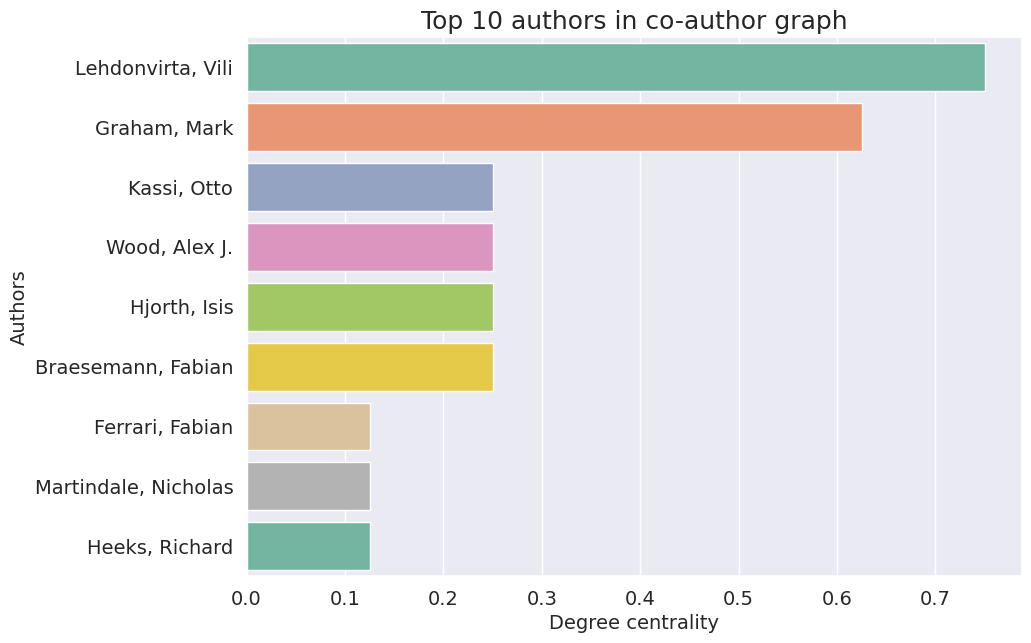

In [ ]:
# Visualizing the top 10 co-authors by degree centrality score
sns.set(font_scale=.75)
cent_df_d10 = cent_df.sort_values('degree', ascending = False)[:10]
cent_df_d10.index.name = "author"
cent_df_d10.reset_index(inplace=True)
print()
plt.figure(figsize=(10,7))
ax = sns.barplot(y = "author", x = "degree", data = cent_df_d10, palette = "Set2");
ax.set_alpha(0.8)
ax.set_title("Top 10 authors in co-author graph", fontsize = 18)
ax.set_ylabel("Authors", fontsize=14);
ax.set_xlabel("Degree centrality", fontsize=14);
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

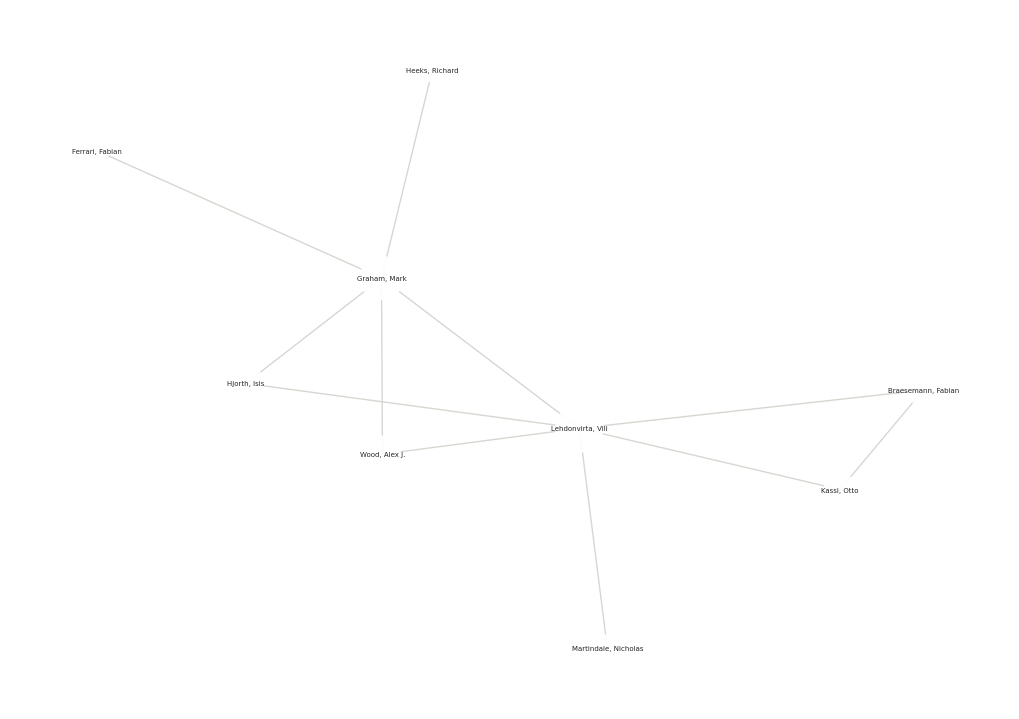

In [ ]:
# Visualizing the co-author network
plt.figure(figsize = (10, 7))
size = [2000 * eig[node] for node in giant_coauth]
nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5,
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)

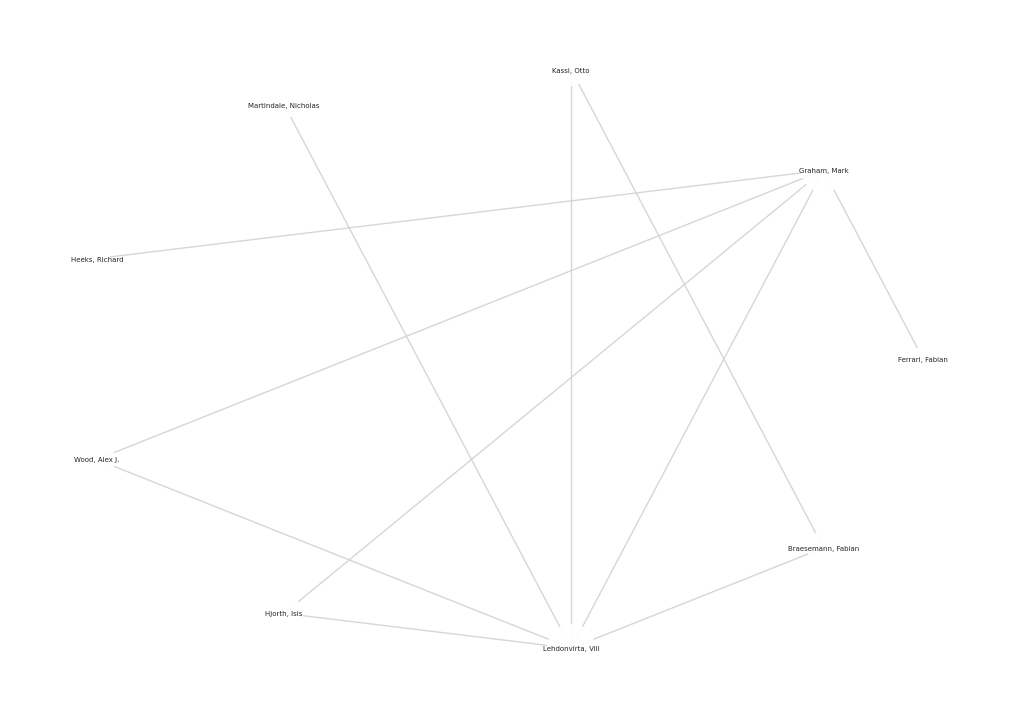

In [ ]:
# Visualizing the co-author network, 2nd
plt.figure(figsize = (10, 7))
size = [2000 * eig[node] for node in giant_coauth]
nx.draw_circular(giant_coauth, node_size = size, with_labels = True, font_size = 5,
              node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)

In [ ]:
# Community detection
partition = community_louvain.best_partition(giant_coauth)
modularity = community_louvain.modularity(partition, giant_coauth)
print("Modularity:", modularity)

Modularity: 0.16568047337278105


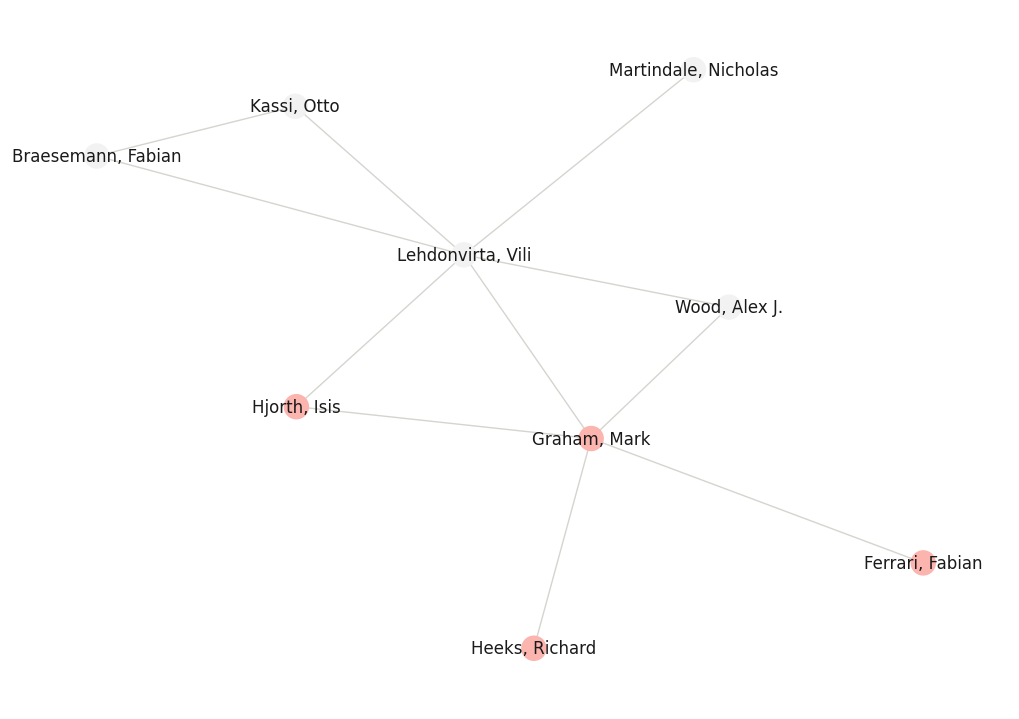

In [ ]:
# Visualizing the communities
plt.figure(figsize = (10, 7))
colors = [partition[n] for n in giant_coauth.nodes()]
nx.draw(giant_coauth, node_color=colors, cmap = plt.cm.Pastel1, edge_color = "#D4D5CE", with_labels=True)